In [1]:
import warnings
warnings.filterwarnings('ignore')
import nltk
nltk.download('stopwords')
import re
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,SGDClassifier
from nltk.tokenize import word_tokenize
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
imdb_data=pd.read_csv('/content/drive/MyDrive/IMDB Dataset.csv')

In [3]:
imdb_data.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [4]:
def review_preprocessing():
    imdb_data['review']=  imdb_data['review'].str.lower()
    imdb_data['review'] = imdb_data['review'].replace({'\s+':' '},regex=True)
    imdb_data['review'] = imdb_data['review'].replace({'\n':''}) 
    imdb_data['review'] = imdb_data['review'].replace({'<.*?>': ''}, regex = True)         
    imdb_data['review'] = imdb_data['review'].replace({'[^A-Za-z]': ' '}, regex = True)
    imdb_data['review'] = imdb_data['review'].replace({'\s+[a-zA-Z]\s+':' '},regex=True)     
    return imdb_data

imdb_data= review_preprocessing()
imdb_data['sentiment'] = imdb_data['sentiment'].replace('positive', 1)
imdb_data['sentiment'] = imdb_data['sentiment'].replace('negative', 0)
imdb_data

,review,sentiment
0,one of the other reviewers has mentioned that ...,1
1,a wonderful little production the filming tec...,1
2,i thought this was wonderful way to spend time...,1
3,basically there a family where little boy jak...,0
4,petter mattei love in the time of money is vi...,1
...,...,...
49995,i thought this movie did down right good job ...,1
49996,bad plot bad dialogue bad acting idiotic di...,0
49997,i am catholic taught in parochial elementary s...,0
49998,i going to have to disagree with the previous ...,0


In [5]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [6]:
stop = stopwords.words('english')

In [7]:
def stemming(text):
    stemmer=PorterStemmer()
    text= ' '.join([stemmer.stem(word) for word in text.split() if word not in stop])
    return text

In [8]:
X=imdb_data['review'].apply(stemming)

In [9]:
X

0        one review mention watch oz episod hook right ...
1        wonder littl product film techniqu unassum old...
2        thought wonder way spend time hot summer weeke...
3        basic famili littl boy jake think zombi closet...
4        petter mattei love time money visual stun film...
                               ...                        
49995    thought movi right good job creativ origin fir...
49996    bad plot bad dialogu bad act idiot direct anno...
49997    cathol taught parochi elementari school nun ta...
49998    go disagre previou comment side maltin one sec...
49999    one expect star trek movi high art fan expect ...
Name: review, Length: 50000, dtype: object

In [10]:
bow=CountVectorizer()
tfidf = TfidfVectorizer()

In [11]:
X_bow=bow.fit_transform(X)

In [12]:
X_tfidf=tfidf.fit_transform(X)

In [13]:
y=imdb_data['sentiment']
print(X_tfidf.shape)
print(X_bow.shape)
print(y.shape)

(50000, 70942)
(50000, 70942)
(50000,)


In [14]:
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X_tfidf, y, random_state=225, test_size=0.2)
X_train_bow, X_test_bow, y_train_bow, y_test_bow=train_test_split(X_bow, y, random_state=225, test_size=0.2 )

In [15]:
print(X_train_tfidf.shape)
print(X_test_tfidf.shape)
print(X_train_bow.shape)
print(X_test_bow.shape)

(40000, 70942)
(10000, 70942)
(40000, 70942)
(10000, 70942)


In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
lr=LogisticRegression()
lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
model_lr_tfidf = lr.fit(X_train_tfidf, y_train_tfidf)
model_lr_bow = lr.fit(X_train_bow, y_train_bow) 

In [19]:
lr_predict_tfidf= model_lr_tfidf.predict(X_test_tfidf)
lr_predict_bow = model_lr_bow.predict(X_test_bow)

In [20]:
print(accuracy_score(y_test_tfidf, lr_predict_tfidf))
print(accuracy_score(y_test_bow, lr_predict_bow))

0.8633
0.8811


In [21]:
print(round(f1_score(y_test_tfidf, lr_predict_tfidf),4))
print(round(f1_score(y_test_bow, lr_predict_bow),4))

0.8666
0.8804


In [22]:
def confusion_matrix_plot(y_test,lr_predict):
    con_matrix=confusion_matrix(y_test,lr_predict)
    ax= plt.subplot()
    sns.heatmap(con_matrix, annot=True, fmt='g', ax=ax);  
    ax.set_title('Confusion Matrix'); 
    ax.set_xlabel('Predicted labels');
    ax.set_ylabel('True labels'); 
    ax.xaxis.set_ticklabels(['positive', 'negative']); 
    ax.yaxis.set_ticklabels(['positive', 'negative'])

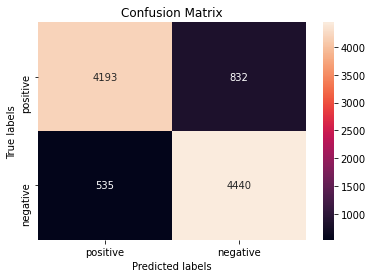

In [23]:
confusion_matrix_plot(y_test_tfidf,lr_predict_tfidf)

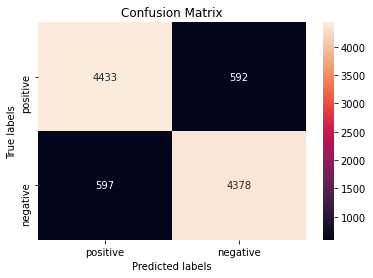

In [24]:
confusion_matrix_plot(y_test_bow,lr_predict_bow)

In [25]:
from sklearn.linear_model import SGDClassifier

In [26]:
svm=SGDClassifier(loss='hinge',max_iter=300,random_state=42)
svm

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=300, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [27]:
model_svm_tfidf=svm.fit(X_train_tfidf, y_train_tfidf)
model_svm_bow=svm.fit(X_train_bow, y_train_bow)

In [28]:
svm_predict_tfidf=model_svm_tfidf.predict(X_test_tfidf)
svm_predict_bow=model_svm_bow.predict(X_test_bow)

In [29]:
print(accuracy_score(svm_predict_tfidf, y_test_tfidf))
print(accuracy_score(svm_predict_bow, y_test_bow))

0.857
0.8764


In [30]:
print(round(f1_score(svm_predict_tfidf, y_test_tfidf),4))
print(round(f1_score(svm_predict_bow, y_test_bow),4))

0.8546
0.8786


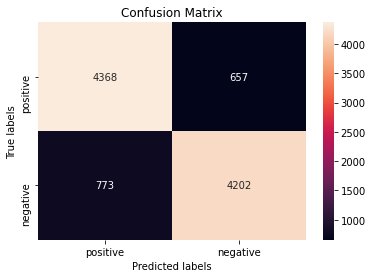

In [31]:
confusion_matrix_plot(y_test_tfidf,svm_predict_tfidf)

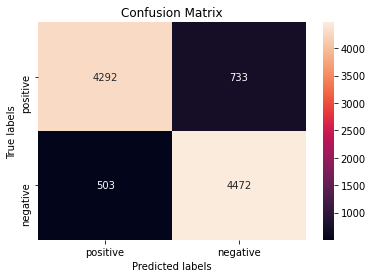

In [32]:
confusion_matrix_plot(y_test_bow,svm_predict_bow)

In [33]:
from sklearn.naive_bayes import MultinomialNB

In [34]:
mnb=MultinomialNB()
mnb

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [35]:
model_mnb_tfidf=mnb.fit(X_train_tfidf, y_train_tfidf)
model_mnb_bow=mnb.fit(X_train_bow, y_train_bow)

In [36]:
mnb_predict_tfidf=model_mnb_tfidf.predict(X_test_tfidf)
mnb_predict_bow=model_mnb_bow.predict(X_test_bow)


In [37]:
print(accuracy_score(mnb_predict_tfidf,y_test_tfidf))
print(accuracy_score(mnb_predict_bow, y_test_bow))

0.8451
0.8524


In [38]:
print(round(f1_score(mnb_predict_tfidf,y_test_tfidf),4))
print(round(f1_score(mnb_predict_bow, y_test_bow),4))

0.8466
0.8492


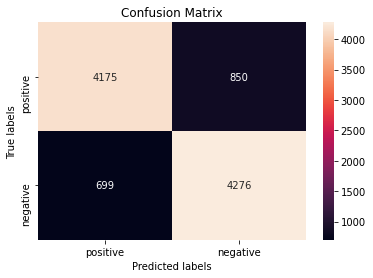

In [39]:
confusion_matrix_plot(y_test_tfidf,mnb_predict_tfidf)

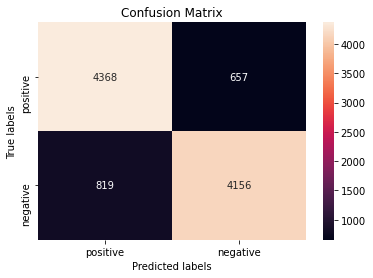

In [40]:
confusion_matrix_plot(y_test_bow,mnb_predict_bow)